In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CVD_cleaned.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [3]:
#Integer encoding
label_encoder = LabelEncoder()

columns_to_encode = ["Exercise", "Heart_Disease", 
                     "Skin_Cancer", "Other_Cancer", "Depression", 
                     "Arthritis", "Sex", "Age_Category", "Smoking_History"]

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
    
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,No,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,0,1,0,0,0,Yes,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,1,0,0,0,0,Yes,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,Poor,Within the past year,1,1,0,0,0,Yes,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,Good,Within the past year,0,0,0,0,0,No,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [4]:
encoding_health = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4}
df['General_Health'] = df['General_Health'].map(encoding_health)

encoding_checkup = {'Never': 0, '5 or more years ago': 1, 'Within the past 5 years': 2, 'Within the past 2 years': 3, 'Within the past year': 4}
df['Checkup'] = df['Checkup'].map(encoding_checkup)


diabetes_data = df[['Diabetes']]

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(diabetes_data)

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Diabetes']))

# Concatenate the original DataFrame with the encoded DataFrame
df_encoded = pd.concat([df.drop(columns=['Diabetes']), encoded_df], axis=1)

df = df_encoded
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Sex,Age_Category,...,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Diabetes_No,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy"
0,0,3,0,0,0,0,0,1,0,10,...,14.54,1,0.0,30.0,16.0,12.0,1.0,0.0,0.0,0.0
1,3,4,0,1,0,0,0,0,0,10,...,28.29,0,0.0,30.0,0.0,4.0,0.0,0.0,1.0,0.0
2,3,4,1,0,0,0,0,0,0,8,...,33.47,0,4.0,12.0,3.0,16.0,0.0,0.0,1.0,0.0
3,0,4,1,1,0,0,0,0,1,11,...,28.73,0,0.0,30.0,30.0,8.0,0.0,0.0,1.0,0.0
4,2,4,0,0,0,0,0,0,1,12,...,24.37,1,0.0,8.0,4.0,0.0,1.0,0.0,0.0,0.0


In [5]:
df_heart_disease_0 = df[df["Heart_Disease"] == 0]
df_heart_disease_1 = df[df["Heart_Disease"] == 1]

#min: num of 0s, num of 1s
samples_per_category = min(len(df_heart_disease_0), len(df_heart_disease_1))
#print(samples_per_category)    =     24971

sample_heart_disease_0 = df_heart_disease_0.sample(n=samples_per_category, random_state=1)
sample_heart_disease_1 = df_heart_disease_1.sample(n=samples_per_category, random_state=1)

balanced_sample = pd.concat([sample_heart_disease_0, sample_heart_disease_1])
#balanced_sample :      49942 rows × 19 columns

balanced_sample = balanced_sample.sample(frac=1, random_state=1)

df5050 = balanced_sample #.sample(n=5000, random_state=1)
df5050

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Sex,Age_Category,...,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Diabetes_No,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy"
75568,3,3,1,0,0,1,0,0,0,10,...,30.79,0,0.0,90.0,60.0,1.0,1.0,0.0,0.0,0.0
291146,1,4,0,1,1,0,0,1,1,11,...,27.20,1,4.0,15.0,15.0,10.0,0.0,0.0,1.0,0.0
34116,1,2,1,0,0,0,0,0,1,8,...,23.67,1,0.0,16.0,0.0,0.0,1.0,0.0,0.0,0.0
280032,4,2,1,0,0,0,0,0,1,2,...,20.83,1,0.0,90.0,8.0,1.0,1.0,0.0,0.0,0.0
50109,0,4,0,1,0,0,1,1,0,8,...,41.40,0,0.0,30.0,20.0,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71994,1,4,1,1,1,0,0,1,1,12,...,31.85,0,8.0,60.0,30.0,1.0,1.0,0.0,0.0,0.0
2048,2,4,1,1,0,1,0,0,0,10,...,26.57,1,0.0,4.0,4.0,2.0,1.0,0.0,0.0,0.0
205817,3,4,1,0,0,0,1,0,0,1,...,20.50,1,20.0,0.0,8.0,12.0,1.0,0.0,0.0,0.0
85662,3,4,1,0,0,0,0,0,1,6,...,22.96,0,3.0,30.0,4.0,4.0,1.0,0.0,0.0,0.0


In [6]:
X = df5050.drop(columns=['Heart_Disease'])
y = df5050['Heart_Disease']
    
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3) 


model = LogisticRegression(max_iter=2000, random_state=0)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]


sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.7922724556861183
Specificity: 0.7262479871175523


In [7]:
X = df5050.drop(columns=['Heart_Disease'])
y = df5050['Heart_Disease']
    
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3) 


model = LogisticRegression(penalty='l2', max_iter=2000, random_state=0)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]


sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.7922724556861183
Specificity: 0.7262479871175523


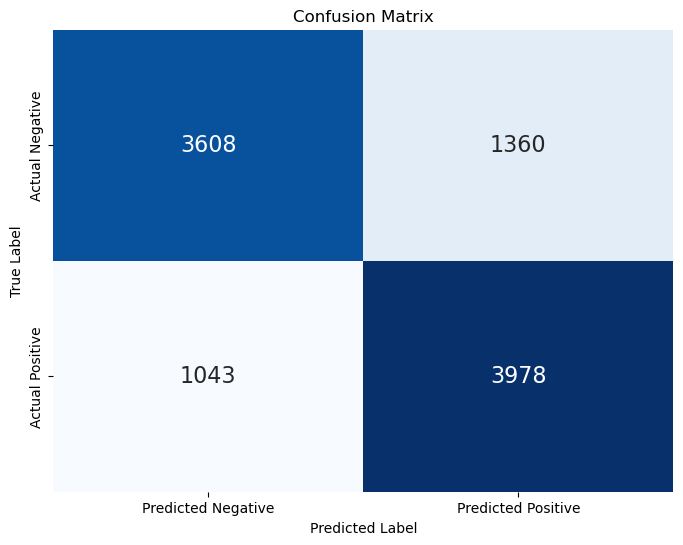

In [8]:
# Convert confusion matrix to DataFrame for visualization
confusion_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ["Height_(cm)", "Weight_(kg)", "BMI"]

# Initialize the scaler
scaler = StandardScaler()

# Create a new DataFrame with scaled columns
df5050s = df5050.copy()

# Fit the scaler on the selected columns and transform them in the new DataFrame
df5050s[columns_to_scale] = scaler.fit_transform(df5050s[columns_to_scale])

# Display the head of the scaled DataFrame
df5050s.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Sex,Age_Category,...,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Diabetes_No,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy"
75568,3,3,1,0,0,1,0,0,0,10,...,0.266172,0,0.0,90.0,60.0,1.0,1.0,0.0,0.0,0.0
291146,1,4,0,1,1,0,0,1,1,11,...,-0.280062,1,4.0,15.0,15.0,10.0,0.0,0.0,1.0,0.0
34116,1,2,1,0,0,0,0,0,1,8,...,-0.817167,1,0.0,16.0,0.0,0.0,1.0,0.0,0.0,0.0
280032,4,2,1,0,0,0,0,0,1,2,...,-1.249286,1,0.0,90.0,8.0,1.0,1.0,0.0,0.0,0.0
50109,0,4,0,1,0,0,1,1,0,8,...,1.880530,0,0.0,30.0,20.0,2.0,0.0,0.0,1.0,0.0


In [30]:
X = df5050s.drop(columns=['Heart_Disease'])
y = df5050s['Heart_Disease']
    
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3) 


model = LogisticRegression(max_iter=2000, random_state=0)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]


sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.7908783110934077
Specificity: 0.7282608695652174


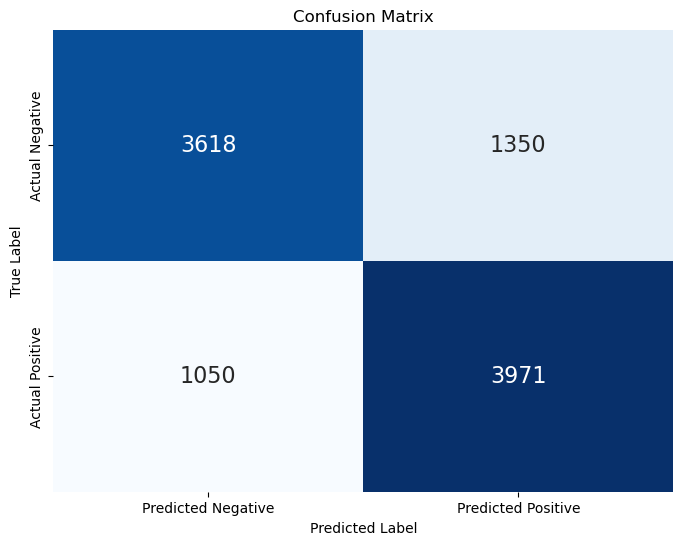

In [31]:
# Convert confusion matrix to DataFrame for visualization
confusion_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [32]:
from sklearn.svm import SVC


X = df5050.drop(columns=['Heart_Disease'])
y = df5050['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Initialize SVM model
modelSVM = SVC(kernel='linear', random_state=0)
# You can use other kernel functions like 'rbf' or 'poly' based on your requirement

modelSVM.fit(X_train, y_train)

y_pred = modelSVM.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.8022306313483369
Specificity: 0.7183977455716586


In [48]:
# Smaller df5050 for faster SVM
dfs = df5050.sample(n=2000, random_state=1)

In [34]:
# Testing SVM with smaller sample


X = dfs.drop(columns=['Heart_Disease'])
y = dfs['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Initialize SVM model
modelSVM = SVC(kernel='linear', random_state=0)
# You can use other kernel functions like 'rbf' or 'poly' based on your requirement

modelSVM.fit(X_train, y_train)

y_pred = modelSVM.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.8415841584158416
Specificity: 0.7474747474747475


In [35]:
# SVM poly for comparison (smaller sample ver.)


X = dfs.drop(columns=['Heart_Disease'])
y = dfs['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Initialize SVM model
modelSVM = SVC(kernel='poly', random_state=0)
# You can use other kernel functions like 'rbf' or 'poly' based on your requirement

modelSVM.fit(X_train, y_train)

y_pred = modelSVM.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.7376237623762376
Specificity: 0.6818181818181818


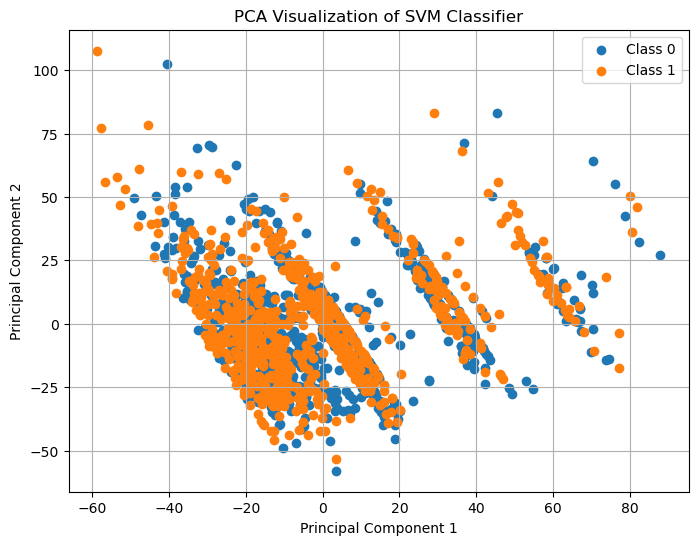

In [39]:
# attempt to visualize

from sklearn.decomposition import PCA

X = dfs.drop(columns=['Heart_Disease'])
y = dfs['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Initialize SVM model
modelSVM = SVC(kernel='linear', random_state=0)
# You can use other kernel functions like 'rbf' or 'poly' based on your requirement

modelSVM.fit(X_train, y_train)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Plot the reduced-dimensional data points
plt.figure(figsize=(8, 6))
for label in np.unique(y_train):
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=f'Class {label}')

plt.title('PCA Visualization of SVM Classifier')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Testing SVM with smaller sample
from sklearn.svm import SVC

X = dfs.drop(columns=['Heart_Disease'])
y = dfs['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Initialize SVM model
modelSVM = SVC(kernel='linear', random_state=0)
# You can use other kernel functions like 'rbf' or 'poly' based on your requirement

modelSVM.fit(X_train, y_train)

y_pred = modelSVM.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.8415841584158416
Specificity: 0.7474747474747475


In [25]:
X = np.array(dfs[['Age_Category', 'General_Health']])
y = dfs['Heart_Disease'].values

print("X array:")
print(X)
print("y array:")
print(y)

X array:
[[ 7  1]
 [12  3]
 [ 9  3]
 ...
 [12  1]
 [11  0]
 [ 2  3]]
y array:
[0 1 1 ... 0 1 0]


In [31]:
#plot the moons dataset
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    
    

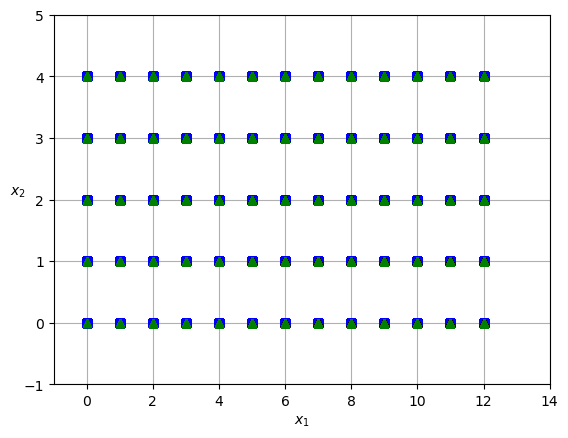

In [32]:
plot_dataset(X, y, [-1, 14, -1, 5])

In [28]:
X = np.array(df[['Age_Category', 'General_Health']])
y = df['Heart_Disease'].values


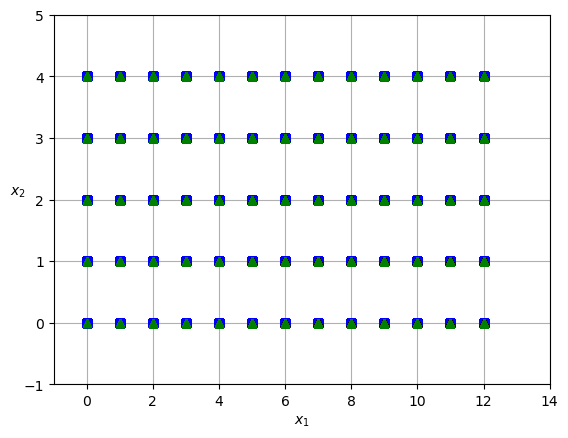

In [30]:
plot_dataset(X, y, [-1, 14, -1, 5])

In [35]:
# super small sample to test SVM visual
dfss = df5050.sample(n=20, random_state=2)

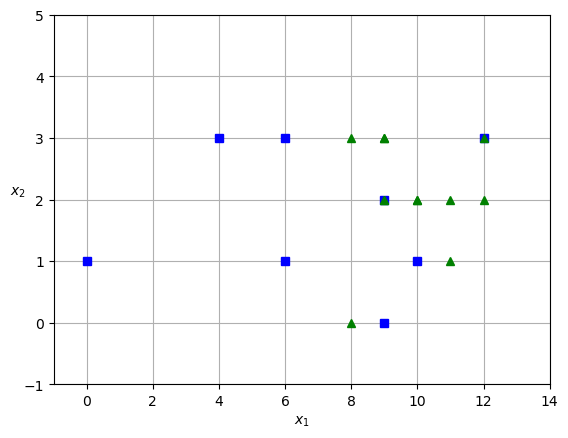

In [36]:
X = np.array(dfss[['Age_Category', 'General_Health']])
y = dfss['Heart_Disease'].values

plot_dataset(X, y, [-1, 14, -1, 5])

In [39]:

X = np.array(dfss[['Age_Category', 'General_Health']])
X = X ** 2 
y = dfss['Heart_Disease'].values

print("X array:")
print(X)
print("y array:")
print(y)

X array:
[[ 16   9]
 [ 36   9]
 [ 36   1]
 [  0   1]
 [ 81   0]
 [ 81   4]
 [ 81   4]
 [100   1]
 [ 64   0]
 [121   4]
 [100   4]
 [ 81   4]
 [ 81   9]
 [144   4]
 [121   1]
 [ 81   9]
 [144   9]
 [100   4]
 [144   9]
 [ 64   9]]
y array:
[0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1]


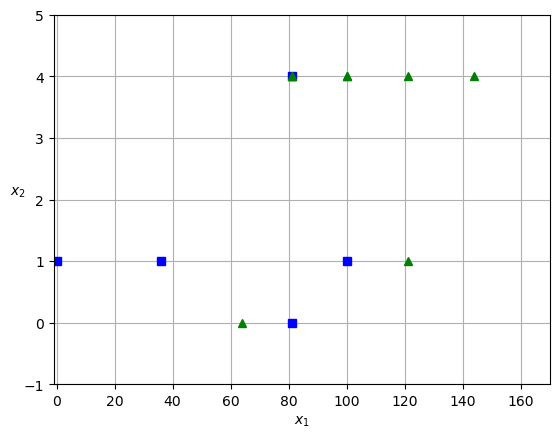

In [40]:
plot_dataset(X, y, [-1, 170, -1, 5])

In [49]:

age_category = dfs['Age_Category'].values
res = dfs['General_Health'] + 3 * dfs['Exercise'] - 2 * dfs['Smoking_History']
X = np.column_stack((age_category, res))

y = dfs['Heart_Disease'].values

print("X array:")
print(X)
print("y array:")
print(y)

X array:
[[ 7  4]
 [12  1]
 [ 9  3]
 ...
 [12 -1]
 [11 -2]
 [ 2  4]]
y array:
[0 1 1 ... 0 1 0]


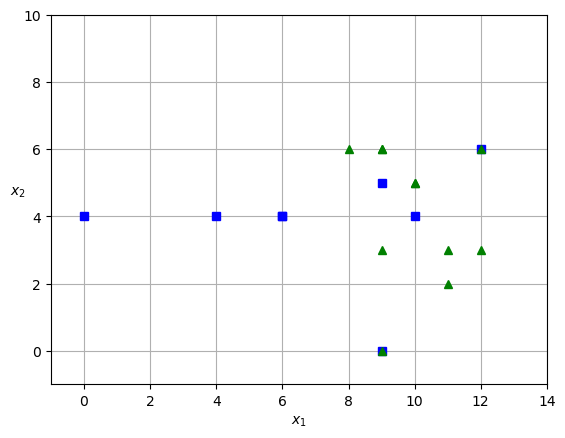

In [47]:
plot_dataset(X, y, [-1, 14, -1, 10])